In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [39]:
from google.colab import files
data=files.upload()

Saving Advertising.xlsx to Advertising (1).xlsx


In [40]:
df=pd.read_excel(data['Advertising.xlsx'])

In [41]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [42]:
df.shape

(200, 5)

In [43]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [45]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [46]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [47]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Check Duplicate Features

In [48]:
df.duplicated().sum()

0

Data Visualization

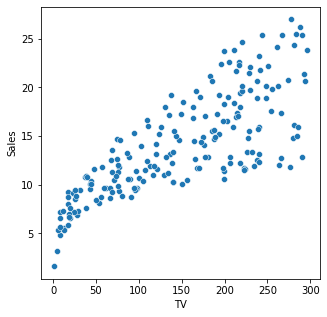

In [49]:
plt.figure(figsize=(5,5))
sb.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

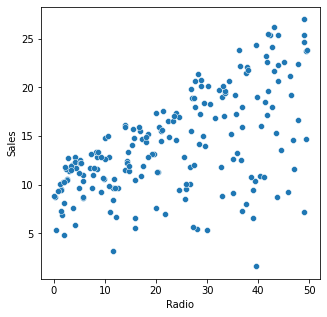

In [50]:
plt.figure(figsize=(5,5))
sb.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

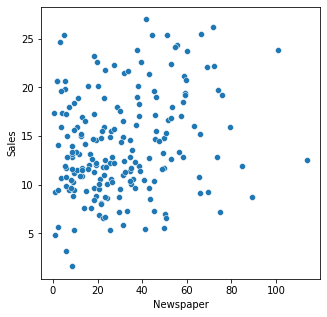

In [51]:
plt.figure(figsize=(5,5))
sb.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [52]:
x=df.drop(['Sales'],axis=1)

In [53]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
y=df['Sales']

In [55]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [57]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=model.predict(X_test)

In [60]:
y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [61]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_pred,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R-Squared',metrics.r2_score(y_pred,y_test))

MAE: 1.3617813502090275
RMSE: 2.0981225634956804
R-Squared 0.8330284237692487
